In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
!ls

interest_surplus.ipynb


/Users/jp/datascience/evo_eco/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


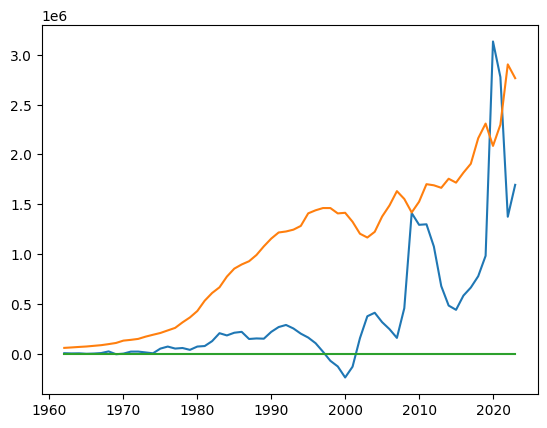

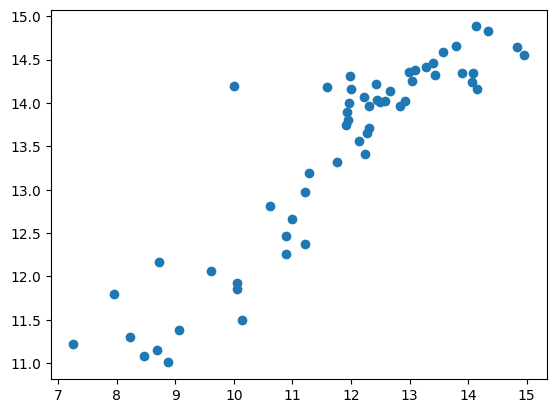

                            OLS Regression Results                            
Dep. Variable:               INTEREST   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     281.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.60e-34
Time:                        12:10:45   Log-Likelihood:                -840.25
No. Observations:                  62   AIC:                             1688.
Df Residuals:                      58   BIC:                             1697.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.739e+07   3.86e+06    -20.054      0.0

In [119]:
interest = pd.read_csv('../data/debt-interest/INTEREST.csv')
surplus = pd.read_csv('../data/debt-interest/SURPLUS.csv')
fedfunds = pd.read_csv('../data/debt-interest/FEDFUNDS.csv')
dgs10 = pd.read_csv('../data/debt-interest/DGS10.csv')


interest["INTEREST"] = interest["INTEREST"] * 1000
surplus["DEFECIT"] = surplus["SURPLUS"] * -1

interest["DATE"] = pd.to_datetime(interest["DATE"]).dt.year
surplus["DATE"] = pd.to_datetime(surplus["DATE"]).dt.year
fedfunds["DATE"] = pd.to_datetime(fedfunds["DATE"]).dt.year
dgs10["DATE"] = pd.to_datetime(dgs10["DATE"]).dt.year

dgs10[dgs10["DGS10"] == "."] = np.nan
dgs10["DGS10"] = dgs10["DGS10"].astype(float)

yearly_interest = interest.groupby("DATE").sum()
yearly_surplus = surplus.groupby("DATE").sum()
yearly_fedfunds = fedfunds.groupby("DATE").mean()
yearly_dgs10 = dgs10.groupby("DATE").mean()




combined = pd.merge(yearly_surplus, yearly_interest, on="DATE")
combined = pd.merge(combined, yearly_fedfunds, on="DATE")
combined = pd.merge(combined, yearly_dgs10, on="DATE")

plt.plot(combined.index, combined["DEFECIT"], label="Surplus/Defecit")
plt.plot(combined.index, combined["INTEREST"], label="Interest")
plt.plot(combined.index, np.zeros(len(combined.index)), label="Zero")

clog = combined.copy()
clog[['DEFECIT', 'INTEREST']] = np.log(combined[['DEFECIT', 'INTEREST']])

clog.dropna(inplace=True)

plt.show()

plt.scatter(clog["DEFECIT"], clog["INTEREST"])

plt.show()

combined["DATE"] = combined.index

X = combined[["DEFECIT", "DGS10", "DATE"]]
X = sm.add_constant(X)
Y = combined["INTEREST"]

print(sm.OLS(Y, X).fit().summary())


                            OLS Regression Results                            
Dep. Variable:               INTEREST   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     209.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.45e-26
Time:                        12:23:34   Log-Likelihood:                -26.466
No. Observations:                  57   AIC:                             58.93
Df Residuals:                      54   BIC:                             65.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.5457      5.854     -4.022      0.0

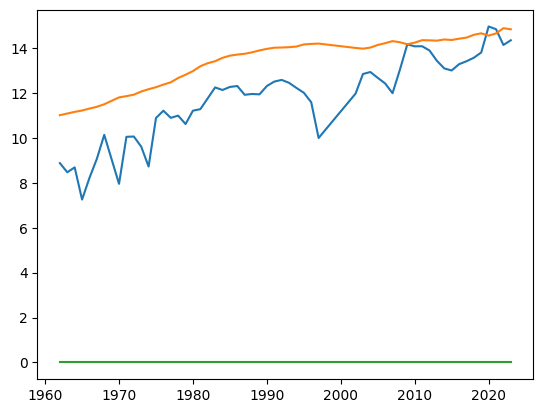

In [123]:
clog["DATE"] = clog.index
clog["D_SQ"] = clog["DATE"] ** 2

X2 = clog[["DEFECIT", "D_SQ"]]
X2 = sm.add_constant(X2)

Y2 = clog["INTEREST"]

plt.plot(clog["DATE"], clog["DEFECIT"], label="Surplus/Defecit")
plt.plot(clog["DATE"], clog["INTEREST"], label="Interest")
plt.plot(clog["DATE"], np.zeros(len(clog["DATE"])), label="Zero")

print(sm.OLS(Y2, X2).fit().summary())